<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


In [9]:
### VALORES INICIALES
h = 0.015 # DELTA T
tmax = 10 # TIEMPO MÁXIMO
thetaini = np.pi/12 # ANGULO INICIAL
omega = 0 # VEL. ANGULAR INICIAL
g = 9.8
l = 1 # LONGITUD DE LA CUERDA
gamma =0.7  # COEFICIENTE DE "FRICCIÓN"


##DEFINIENDO ECUACION DIFERENCIAL
def fun(theta, omega):

  dtheta_dt = omega
  domega_dt = ((-g/l)*(theta)) - (gamma*l*dtheta_dt)
  return np.array([dtheta_dt, domega_dt])

## EMPLEANDO EL METODO DE EULER
def euler_method(fun,theta0, omega0, t0, tmax, h):
  steps = int((tmax-t0)/h)
  solution = np.zeros((steps,2))
  theta_temp= theta0
  omega_temp= omega0
  time= np.linspace(t0,tmax,steps)
  for i in range(steps):
    time=time+h
    solution[i] = [theta_temp, omega_temp]
    omega_temp = omega_temp + h*(fun(theta_temp,omega_temp)[1])
    theta_temp = theta_temp + omega_temp*h
  return time, solution

# SOLUCION POR EULER
time, solutions = euler_method(fun, thetaini, omega, 0, tmax, h)
theta=solutions[:,0]


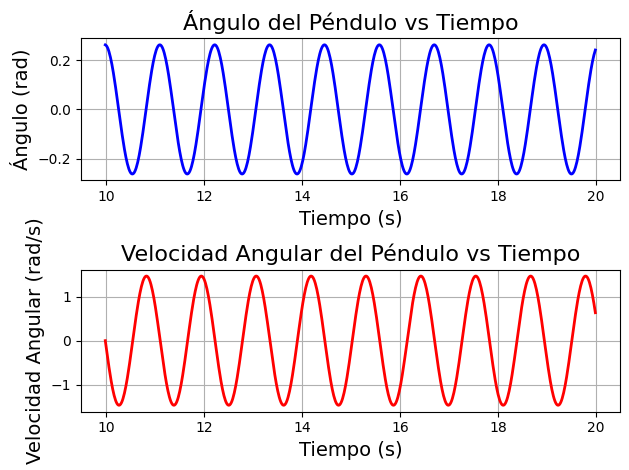

In [281]:
## GRAFICANDO T VS OMEGA Y THETA
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(time, solutions[:,0], color='blue', linewidth=2)
ax1.set_title('Ángulo del Péndulo vs Tiempo', fontsize=16)
ax1.set_xlabel('Tiempo (s)', fontsize=14)
ax1.set_ylabel('Ángulo (rad)', fontsize=14)
ax1.grid()
ax2.plot(time, solutions[:,1], color='red', linewidth=2)
ax2.set_title('Velocidad Angular del Péndulo vs Tiempo', fontsize=16)
ax2.set_xlabel('Tiempo (s)', fontsize=14)
ax2.set_ylabel('Velocidad Angular (rad/s)', fontsize=14)
ax2.grid()
plt.tight_layout()
plt.show()


In [284]:
## EMPLEANDO LIBRERIA ODEINT
def fun(W,t):
  theta, omega = W
  dtheta_dt = omega
  domega_dt = ((-g/l)*theta) - (gamma*l*dtheta_dt)
  return np.array([dtheta_dt, domega_dt])

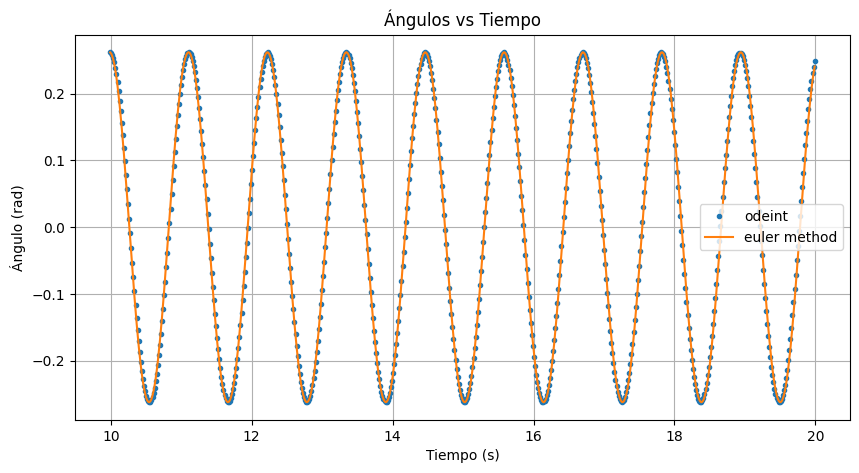

In [285]:
#COMPARACION GRAFICA ODEINT EULER
Vals=[thetaini,omega]
solucion= odeint(fun,Vals,time)
plt.figure(figsize=(10, 5))

plt.plot(time,solucion[:,0], '.', label="odeint")
plt.plot(time,solutions[:,0], '-', label= "euler method")
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulos vs Tiempo')
plt.grid()
plt.legend()
plt.show()



\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


In [286]:
##EMPLEANDO EL METODO DE RUNGE KUTTA
def funcion(w,t):
  theta, omega = w

  dw0dt= omega
  dw1dt= (-g/l)*np.sin(theta) - (gamma*l*omega)
  dwdt= np.array([dw0dt, dw1dt])
  return dwdt
def rugenk(theta0, omega0, t0, tmax, dt):
    N= int((tmax-t0)/dt)
    time= np.linspace(t0 ,tmax,N)
    w = np.zeros((N,2))
    w[0]= np.array([theta0, omega0])
    u = np.zeros((N,2))

    for i in range(0, N-1):
      k1 = dt * funcion(w[i], time[i])
      k2 = dt * funcion(w[i] + 0.5 * k1, time[i] + 0.5 * dt)
      k3 = dt * funcion(w[i] + 0.5 * k2, time[i] + 0.5 * dt)
      k4 = dt * funcion(w[i] + k3, time[i] + dt)
      w[i+1]= w[i]+ (k1 + 2*k2 + 2*k3)/6
      k1=k2 = k3=k4=w[i+1]
      u[i+1]=w[i]+  (k1 + 2*k2 + 2*k3)/6
    return time, w,u

time, w, u= rugenk(thetaini,omega, 0, tmax, h)

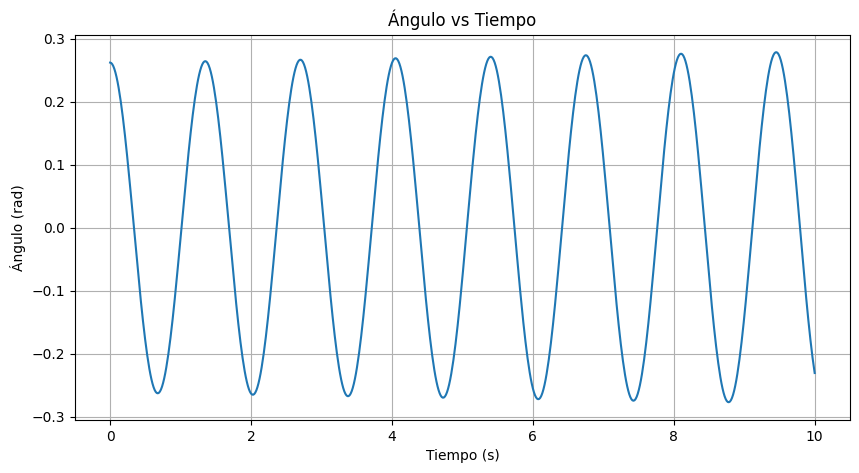

In [287]:
#GRAFICANDO METODO DE RUNG K..
plt.figure(figsize=(10, 5))
plt.plot(time,w[:,0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo vs Tiempo')
plt.grid()
plt.show()


1) Si el delta t es mas grande, se pierde la similaridad entre los metodos\
2) Si el ángulo theta inicial no es pequeño, hay una pequeña variacion en las graficas, es decirl, se desplaza a la izquierda un poco.\
3) Mientras mèas grande L más rápido llega al reposo, Lo que cambia el theta inicial es que la oscilación del pendulo sera máyor al igual que la velociadad angular, sin embargo en la grafica no se aprecia mayor cambio a la curva, solo los valores iniciales de theta y omega\
4)La energía se conserva si gamma=0, es decir, si no esta en un fluido o si no hay una furza qeu se opene al movimiento del péndulo.\
5) Son muy similares las graficas entre euler y runge kutta
6) La animacion del pendulo fue copiada y modificada de este codifgo: https://github.com/logdog/YouTube/blob/main/Lagrangian%20Mechanics%20in%20Python/Simple%20Pendulum/animate_simple_pendulum.ipynb
El video esta en los archivos y está nombrado como pend.mp4

In [5]:

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
fps = 30


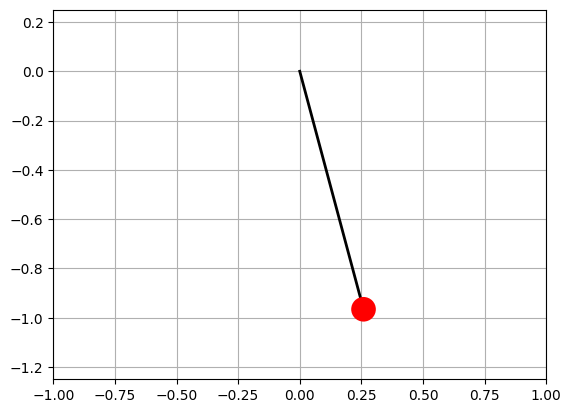

In [8]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(theta):
    return (l*np.sin(theta), -l*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 0.25)
ax.grid()

x0, y0 = pend_pos(thetaini)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(thetaini), 0.05, fc='r', zorder=3))

# animate each frame "i"
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(time))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('pend.mp4', writer=ffmpeg_writer)
